#### 🎢 Predicting Roller Coaster Construction Costs – Exploratory Data Analysis

Roller coasters are massive engineering projects — and their price tags can run into the millions.  
I wanted to know: **can I predict how much a roller coaster costs to build just by looking at its features?**

This notebook is my first step toward that goal.  
Here’s what I plan to do:
1. Explore the dataset of roller coasters worldwide  
2. Clean and prepare the data (standardizing cost, dates, removing duplicates)  
3. Investigate which features might influence cost (speed, height, inversions, etc.)  
4. Produce a cleaned dataset ready for modeling  

By the end, I’ll have a solid understanding of which features seem promising and be ready to train a predictive model.


In [ ]:
# Step 0: Imports & Setup
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # ==============================

# 🎢 Roller Coaster Cost Prediction
# ==============================

# --- 1. Imports & Setup ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Consistent plot style
sns.set_theme(style="whitegrid", context="notebook")
pl.Config.set_tbl_cols(200)

# --- 2. Load Data ---
DATA_PATH = Path.cwd().parent / "data" / "coaster_db_clean.csv"  # robust path
df = pd.read_csv(DATA_PATH)
df.head()

import plotly.express as px

# Display options
pl.Config.set_tbl_cols(200)

# Load raw data
df = pl.read_csv("../data/coaster_db.csv")
print(f"Raw dataset shape: {df.shape}")
df.head(5)

Raw dataset shape: (1087, 56)


coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,f64,f64,str,str,str,str,f64,str,f64,f64,str,f64,i64,f64
"""Switchback Railway""","""600 ft (180 m)""","""6 mph (9.7 km/h)""","""Coney Island""","""Removed""","""June 16, 1884""","""Wood""","""LaMarcus Adna Thompson""",null,"""Lift Packed""","""50 ft (15 m)""",null,"""gravity""",null,null,"""Coney Island Cyclone Site""","""1:00""","""1600 riders per hour""","""2.9""","""LaMarcus Adna Thompson""","""30°""","""43 ft (13 m)""",null,null,null,"""Gravity pulled coaster""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1884,40.574,-73.978,"""Wood""","""1884-06-16""","""6 mph ""","""9.7 km/h""",6.0,"""mph""",6.0,50.0,"""ft""",null,0,2.9
"""Flip Flap Railway""",null,null,"""Sea Lion Park""","""Removed""","""1895""","""Wood""","""Lina Beecher""",null,null,null,1,null,null,"""a single car. Riders are arran…",null,null,null,"""12""","""Lina Beecher""",null,null,null,null,null,null,null,null,"""1902""",null,null,null,null,null,null,null,null,null,null,null,null,1895,40.578,-73.979,"""Wood""","""1895-01-01""",null,null,null,null,null,null,null,null,1,12.0
"""Switchback Railway (Euclid Bea…",null,null,"""Cleveland, Ohio, United States""","""Closed""",null,"""Other""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""1895""",null,null,null,null,null,null,null,null,null,null,null,1896,41.58,-81.57,"""Other""",null,null,null,null,null,null,null,null,null,0,null
"""Loop the Loop (Coney Island)""",null,null,"""Other""","""Removed""","""1901""","""Steel""","""Edwin Prescott""",null,null,null,1,null,null,"""a single car. Riders are arran…",null,null,null,null,"""Edward A. Green""",null,null,null,null,"""Switchback Railway""",null,null,null,"""1910""",null,"""Giant Racer""",null,null,null,null,null,null,null,null,null,null,1901,40.5745,-73.978,"""Steel""","""1901-01-01""",null,null,null,null,null,null,null,null,1,null
"""Loop the Loop (Young's Pier)""",null,null,"""Other""","""Removed""","""1901""","""Steel""","""Edwin Prescott""",null,null,null,1,null,null,null,null,null,null,null,"""Edward A. Green""",null,null,null,null,null,null,null,null,"""1912""",null,null,null,null,null,null,null,null,null,null,null,null,1901,39.3538,-74.4342,"""Steel""","""1901-01-01""",null,null,null,null,null,null,null,null,1,null


#### 1. Understanding the Dataset

The dataset includes coaster names, locations, manufacturers, physical characteristics  
(speed, height, inversions), and sometimes reported construction costs.

Before I can model costs, I need to make sure:
- Cost data is numeric and comparable (consistent currency & units)
- Duplicates and irrelevant columns are removed
- Dates and numeric features are properly typed


In [5]:
# Preview schema and column types
print(df.schema)
pl.DataFrame({"column": df.columns, "dtype": df.dtypes})

# Summary statistics (quick check for missing values, ranges)
df.describe()

Schema({'coaster_name': String, 'Length': String, 'Speed': String, 'Location': String, 'Status': String, 'Opening date': String, 'Type': String, 'Manufacturer': String, 'Height restriction': String, 'Model': String, 'Height': String, 'Inversions': Int64, 'Lift/launch system': String, 'Cost': String, 'Trains': String, 'Park section': String, 'Duration': String, 'Capacity': String, 'G-force': String, 'Designer': String, 'Max vertical angle': String, 'Drop': String, 'Soft opening date': String, 'Fast Lane available': String, 'Replaced': String, 'Track layout': String, 'Fastrack available': String, 'Soft opening date.1': String, 'Closing date': String, 'Opened': String, 'Replaced by': String, 'Website': String, 'Flash Pass Available': String, 'Must transfer from wheelchair': String, 'Theme': String, 'Single rider line available': String, 'Restraint Style': String, 'Flash Pass available': String, 'Acceleration': String, 'Restraints': String, 'Name': String, 'year_introduced': Int64, 'latitu

statistic,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,str,str,str,str,f64,str,f64,f64,str,f64,f64,f64
"""count""","""1087""","""953""","""937""","""1087""","""874""","""837""","""1087""","""1028""","""831""","""744""","""965""",932.0,"""795""","""382""","""718""","""487""","""765""","""575""","""362""","""578""","""357""","""494""","""96""","""69""","""173""","""335""","""19""","""96""","""236""","""27""","""88""","""87""","""50""","""106""","""44""","""81""","""22""","""46""","""60""","""24""","""35""",1087.0,812.0,812.0,"""1087""","""837""","""937""","""935""",937.0,"""937""",937.0,965.0,"""965""",171.0,1087.0,362.0
"""null_count""","""0""","""134""","""150""","""0""","""213""","""250""","""0""","""59""","""256""","""343""","""122""",155.0,"""292""","""705""","""369""","""600""","""322""","""512""","""725""","""509""","""730""","""593""","""991""","""1018""","""914""","""752""","""1068""","""991""","""851""","""1060""","""999""","""1000""","""1037""","""981""","""1043""","""1006""","""1065""","""1041""","""1027""","""1063""","""1052""",0.0,275.0,275.0,"""0""","""250""","""150""","""152""",150.0,"""150""",150.0,122.0,"""122""",916.0,0.0,725.0
"""mean""",null,null,null,null,null,null,null,null,null,null,null,1.54721,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1994.986201,38.373484,-41.595373,null,null,null,null,53.850374,null,48.617289,89.575171,null,101.996491,1.326587,3.824006
"""std""",null,null,null,null,null,null,null,null,null,null,null,2.114073,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,23.475248,15.516596,72.285227,null,null,null,null,23.385518,null,16.678031,136.246444,null,67.329092,2.030854,0.989998
"""min""","""10 Inversion Roller Coaster""","""1,000.0 m (3,280.8 ft)""","""10 mph (16 km/h)""","""2904 Fantasy Way Myrtle Beach,…","""Chapter 7 bankruptcy; rides di…","""1 July 2017""","""Other""","""Allan Herschell Company""","""100 cm (3 ft 3 in)""","""1000""","""10 ft (3.0 m)""",0.0,"""1 Chain lift hill""","""$1,000,000""","""1 train containing 10 cars. Ri…","""1904 World's Fair""","""00:38""","""1,000 riders per hour""","""-1,5g and 4,5g""","""Al CollinsJeff Gramke""","""100°""","""100 ft (30 m)""","""16 December 2011[1]""","""Fast Lane available""","""20,000 Leagues Under the Sea: …","""8 layers laminated wood strips…","""Fastrack available""","""16 December 2011[1]""","""1 September 2019[1]""","""13 April 1860 (as country esta…","""Apocalypse: The Ride""","""Archived Official Website""","""Flash Pass Available""","""Must transfer from wheelchair""","""Africa""","""Single rider line available""","""Individual ratcheting lap bar,…","""Flash Pass available""","""""0 to 46.6 mph (0 to 75 km/h) …","""Individual lap bar""","""Bavarian Mountain Railroad""",1884.0,-48.2617,-123.0357,"""Other""","""1884-06-16""","""10 mph ""","""100 km/h""",5.0,"""km/h""",5.0,4.0,"""ft""",13.1,0.0,0.8
"""25%""",null,null,null,null,null,null,null,null,null,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,

#### 2. Cleaning & Preparing the Data

My cleaning plan:
- Keep only the relevant columns
- Parse opening dates into proper datetime format
- Convert speed/height to numeric
- Clean and standardize the "Cost" column
- Drop duplicate rows

Eventually, I can wrap this in a `cleaning.py` function — but for now, I’ll do it step by step.


In [6]:
coaster = df[
    [
        "coaster_name",
        "Location",
        "Status",
        "Manufacturer",
        "year_introduced",
        "Cost",
        "latitude",
        "longitude",
        "Type_Main",
        "opening_date_clean",
        "speed_mph",
        "height_ft",
        "Inversions_clean",
        "Gforce_clean",
    ]
].clone()

# Parse opening date and cast numeric features
coaster = coaster.with_columns(
    pl.col("opening_date_clean")
    .str.to_datetime(strict=False)
    .dt.date()
    .alias("opening_date_clean")
)
coaster = coaster.with_columns(pl.col("speed_mph").cast(pl.Float64, strict=False))

# Clean cost strings, extract numeric values, convert to float
coaster = coaster.with_columns(
    pl.col("Cost")
    .cast(pl.Utf8)
    .str.to_lowercase()
    .str.replace_all(r"\[.*?\]|\(.*?\)|approx.*|about.*|rebuild.*|est.*", "")
    .str.replace_all(r"us\$|usd|\$", " USD ")
    .str.replace_all(r"£|gbp", " GBP ")
    .str.replace_all(r"€|eur", " EUR ")
    .str.replace_all(r"¥|yen|jpy", " JPY ")
    .str.replace_all(r"rmb|cny", " CNY ")
    .str.replace_all(r"sek", " SEK ")
    .str.replace_all(r"aud|a\$", " AUD ")
    .str.replace_all(r"cad|c\$", " CAD ")
    .str.replace_all(r" billion", "e9")
    .str.replace_all(r" million", "e6")
    .str.replace_all(r"\bm\b", "e6")
    .str.replace_all(r"(\d)\.(\d{3})(\D|$)", r"\1,\2\3")
    .str.extract(r"([\d\.,]+e\d+|[\d\.,]+)", 1)
    .str.replace_all(",", "")
    .alias("Cost_Clean")
).with_columns(pl.col("Cost_Clean").cast(pl.Float64, strict=False))

# Rename columns for clarity & drop duplicates
coaster = coaster.drop("Cost").rename(
    {
        "coaster_name": "Coaster_Name",
        "year_introduced": "Year_Introduced",
        "opening_date_clean": "Opening_Date",
        "speed_mph": "Speed_mph",
        "height_ft": "Height_ft",
        "Inversions_clean": "Inversions",
        "Gforce_clean": "Gforce",
        "Cost_Clean": "Cost",
    }
)

coaster = coaster.unique(
    subset=["Coaster_Name", "Location", "Opening_Date", "Speed_mph"]
)
print(f"Cleaned dataset shape: {coaster.shape}")

Cleaned dataset shape: (990, 14)


#### 3. : What Drives Cost?  💸

Next, I looked at how each feature relates to `Cost`.  
Because some coasters are extremely expensive, I plotted **log(Cost)** to make the relationship easier to see.

**Observations:**
- **Height vs Cost**: Surprisingly flat — tall coasters don't necessarily cost more.
- **Speed vs Cost**: Slight upward trend — faster coasters tend to cost a bit more, but there’s a lot of variability.
- **Inversions vs Cost**: Very weak relationship — just having inversions doesn’t seem to drive cost much.

There are also some suspiciously low-cost rides (near zero). These might be missing or bad data, so I may drop or impute them before modeling.



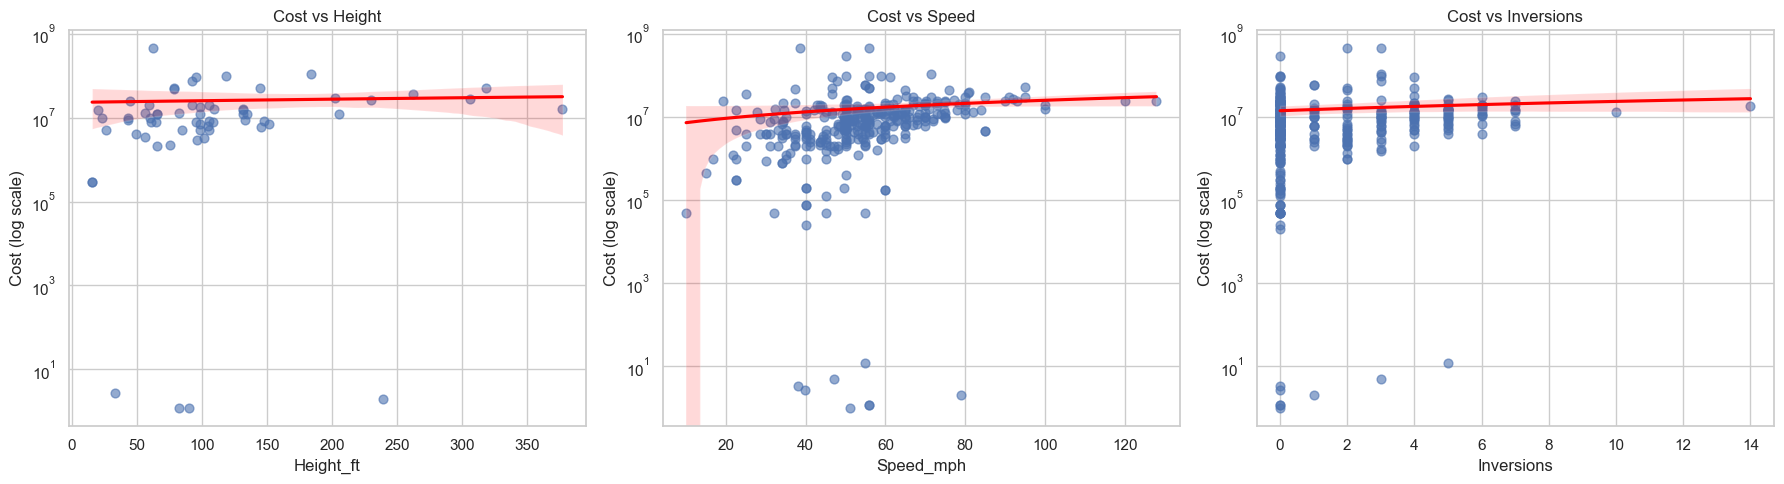

In [8]:
# Filter out extreme outliers for cleaner plots
plot_df = coaster.filter(pl.col("Cost") < 1e9).to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(
    x="Height_ft",
    y="Cost",
    data=plot_df,
    ax=axes[0],
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "red"},
)
sns.regplot(
    x="Speed_mph",
    y="Cost",
    data=plot_df,
    ax=axes[1],
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "red"},
)
sns.regplot(
    x="Inversions",
    y="Cost",
    data=plot_df,
    ax=axes[2],
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "red"},
)

for ax, title in zip(axes, ["Height", "Speed", "Inversions"]):
    ax.set_yscale("log")
    ax.set_title(f"Cost vs {title}", fontsize=12)
    ax.set_ylabel("Cost (log scale)")
plt.tight_layout()
plt.show()

##### Observations

- **Height & Speed:** There’s a general upward trend — extreme coasters tend to cost more, but variance is high.  
- **Inversions:** Having more inversions doesn’t necessarily mean a coaster is more expensive.

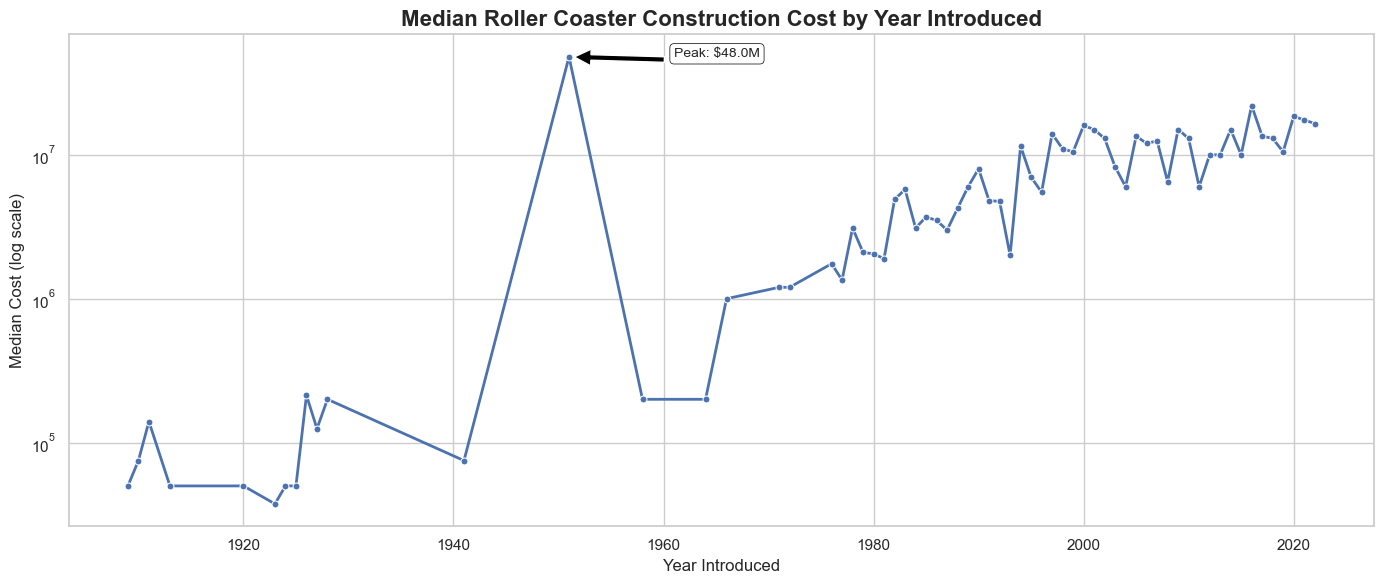

In [ ]:
# Group by year introduced and calculate median cost
yearly_cost = (
    coaster.filter(pl.col("Cost").is_not_null())
    .group_by("Year_Introduced")
    .agg(pl.median("Cost").alias("Median_Cost"))
    .sort("Year_Introduced")
)

# Convert to pandas for plotting
yearly_df = yearly_cost.to_pandas()

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=yearly_df,
    x="Year_Introduced",
    y="Median_Cost",
    marker="o",
    linewidth=2,
    markersize=5,
)

plt.yscale("log")

plt.title(
    "Median Roller Coaster Construction Cost by Year Introduced",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year Introduced", fontsize=12)
plt.ylabel("Median Cost (log scale)", fontsize=12)

# Annotate the peak year
peak_year = yearly_df.loc[yearly_df["Median_Cost"].idxmax()]

plt.annotate(
    f"Peak: ${peak_year['Median_Cost']/1e6:.1f}M",
    xy=(peak_year["Year_Introduced"], peak_year["Median_Cost"]),  # type: ignore
    xytext=(peak_year["Year_Introduced"] + 10, peak_year["Median_Cost"]),  # type: ignore
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5),
)

plt.tight_layout()
plt.show()

#### Median Roller Coaster Construction Cost Over Time

This line plot tracks how the **median construction cost** of roller coasters has evolved over time.

**Observations:**
- Costs were very low and stable until the mid-20th century, staying under $1M.
- There is a dramatic rise starting in the 1970s–1980s, coinciding with the "Coaster Wars" era when parks built taller, faster rides.
- Median costs today are easily **10–20x higher** than they were in the 1960s.
- The spike in **{peak_year['Year_Introduced']}** represents the most expensive coaster year in the dataset, with a median cost of **${peak_year['Median_Cost']/1e6:.1f}M**.
- The overall upward trend shows how modern coasters are increasingly complex, expensive, and engineered for spectacle.


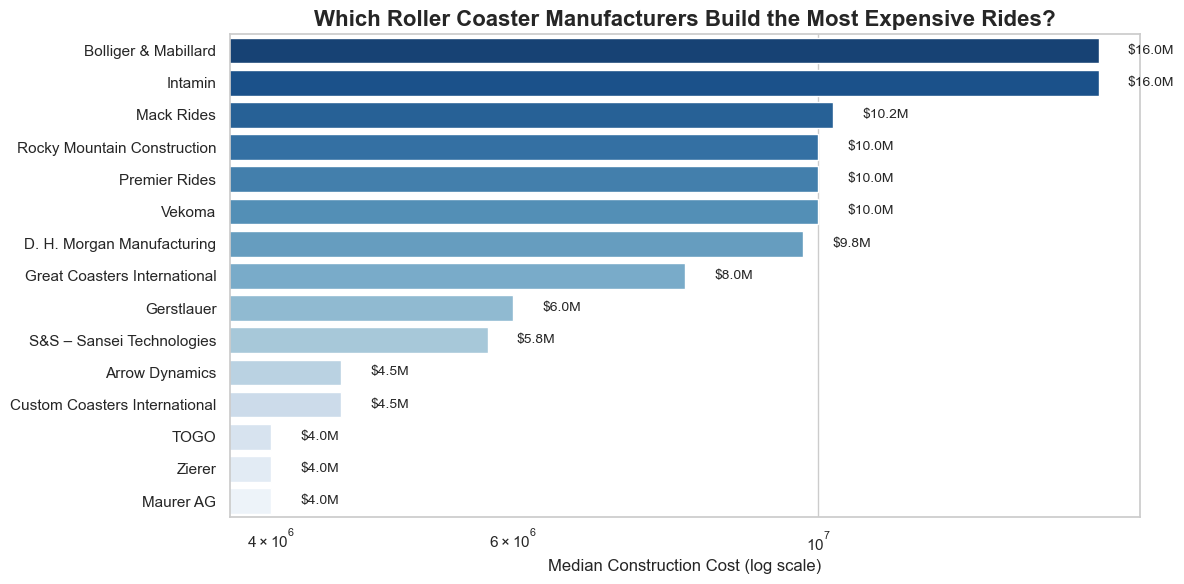

In [ ]:
# Median cost per manufacturer (filter out those with very few coasters to avoid noise)
manufacturer_cost = (
    coaster.filter(pl.col("Cost").is_not_null())
    .group_by("Manufacturer")
    .agg(
        [
            pl.len().alias("Count"),
            pl.median("Cost").alias("Median_Cost"),
        ]
    )
    .filter(pl.col("Count") >= 5)
    .sort("Median_Cost", descending=True)
)

manufacturer_df = manufacturer_cost.to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(
    y="Manufacturer",
    x="Median_Cost",
    hue="Manufacturer",
    data=manufacturer_df.head(15),
    palette="Blues_r",
    dodge=False,
    legend=False,
)

plt.xscale("log")

# Add annotations directly on bars
for index, value in enumerate(manufacturer_df.head(15)["Median_Cost"]):
    plt.text(value * 1.05, index, f"${value/1e6:.1f}M", va="center", fontsize=10)

plt.title(
    "Which Roller Coaster Manufacturers Build the Most Expensive Rides?",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Median Construction Cost (log scale)", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Median Roller Coaster Construction Cost by Manufacturer

Looking at the median construction cost across manufacturers helps me identify who tends to build the most expensive coasters.

**Observations:**
- **Bolliger & Mabillard** and **Intamin** stand out as the top two, with median coaster costs well over \$10M — these are industry leaders in high-thrill, high-budget coasters.
- Mid-tier manufacturers like **Mack Rides**, **Vekoma**, and **Rocky Mountain Construction** also show consistently high build costs, often reflecting innovation (e.g., hybrid coasters).
- Smaller firms such as **Maurer AG** and **TOGO** produce significantly cheaper coasters, likely family rides or smaller-scale attractions.
- The log scale makes it clear that cost differences are dramatic — the top players cost **2-3x more** than the lower-tier ones.
